In [1]:
import pandas as pd
from numpy import random
from sklearn.preprocessing import StandardScaler

resultados_exames = pd.read_csv("exames.csv")

SEED = 123143
random.seed(SEED)

valores_exames = resultados_exames.drop(columns = ['id', 'diagnostico'])
diagnostico = resultados_exames.diagnostico
valores_exames_v1 = valores_exames.drop(columns="exame_33")

padronizador = StandardScaler()
padronizador.fit(valores_exames_v1)
valores_exames_v2 = padronizador.transform(valores_exames_v1)
valores_exames_v2 = pd.DataFrame(data = valores_exames_v2, columns = valores_exames_v1.keys())
valores_exames_v3 = valores_exames_v2.drop(columns= ["exame_4","exame_29"])
matriz_correlacao = valores_exames_v3.corr()
matriz_correlacao_v1 = matriz_correlacao[matriz_correlacao>0.99]
matriz_correlacao_v2 = matriz_correlacao_v1.sum()
variaveis_correlacionadas = matriz_correlacao_v2[matriz_correlacao_v2 > 1]
variaveis_correlacionadas
valores_exames_v4 = valores_exames_v3.drop(columns=variaveis_correlacionadas.keys())
valores_exames_v5 = valores_exames_v3.drop(columns=["exame_3", "exame_24"])

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

def classificar(valores):
  SEED = 1234
  random.seed(SEED)
  treino_x, teste_x, treino_y, teste_y = train_test_split(valores, diagnostico, test_size = 0.3)

  classificador = RandomForestClassifier(n_estimators=100)
  classificador.fit(treino_x, treino_y)
  print("Acúracia da classificação de %.2f%%" %(classificador.score(teste_x, teste_y) * 100))

In [3]:
from sklearn.feature_selection import SelectKBest, chi2

SEED = 1234
random.seed(SEED)

selecionar_kmelhores = SelectKBest(chi2, k = 5)

valores_exames_v6 = valores_exames_v1.drop(columns=["exame_4", "exame_29", "exame_3", "exame_24"])
treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, diagnostico, test_size = 0.3)

selecionar_kmelhores.fit(treino_x, treino_y)
treino_kbest = selecionar_kmelhores.transform(treino_x)
teste_kbest = selecionar_kmelhores.transform(teste_x)

classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_kbest, treino_y)
print("Acúracia da classificação de %.2f%%" %(classificador.score(teste_kbest, teste_y) * 100))

Acúracia da classificação de 92.40%


[Text(56.5, 0.5, 'Real'), Text(0.5, 38.5, 'Predição')]

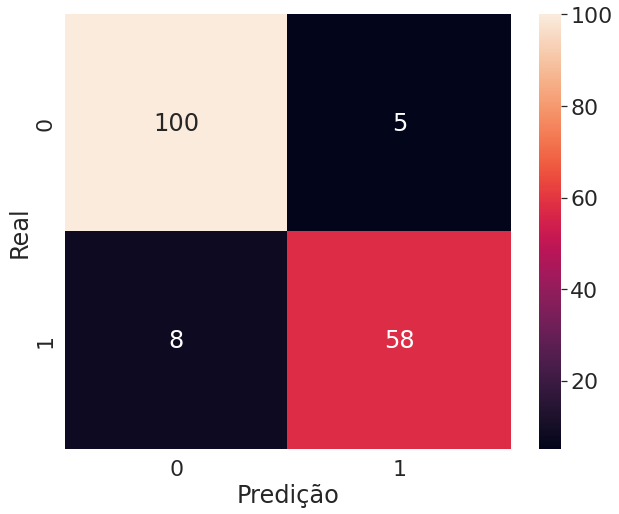

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_kbest))

plt.figure(figsize= (10, 8))
sns.set(font_scale = 2)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel = "Real")

Resultado da classificação 90.06%


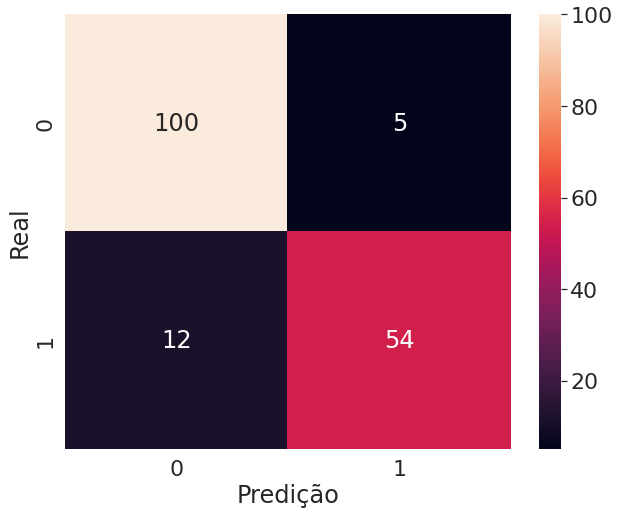

In [10]:
from sklearn.feature_selection import RFE

SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6,
                                                       diagnostico,
                                                       test_size = 0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state = 1234)
classificador.fit(treino_x, treino_y)


selecionador_rfe = RFE(estimator = classificador, n_features_to_select = 5, step = 1)
selecionador_rfe.fit(treino_x, treino_y)
treino_rfe = selecionador_rfe.transform(treino_x)
teste_rfe = selecionador_rfe.transform(teste_x)
classificador.fit(treino_rfe, treino_y)

matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfe))
plt.figure(figsize = (10, 8))
sns.set(font_scale = 2)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel = "Real")

print("Resultado da classificação %.2f%%" % (classificador.score(teste_rfe, teste_y)* 100))